## Final Project Submission

Please fill out:
* Student name: Joan Awuor Owuor
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


In [371]:
import pandas as pd
import numpy as np
import csv

import seaborn as sns
import matplotlib.pyplot as plt

In [372]:
df = pd.read_csv(r'C:\Users\pc\Downloads\dsc-phase-1-project-v2-3\zippedData\bom.movie_gross.csv.gz')

In [373]:
df.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


Check if the boom.movie_gross.csv is ready for analysis

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [375]:
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [376]:
null_values_studio = df[df['studio'].isnull()]
null_values_studio

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


In [377]:

studios = df['studio'].nunique()
studios


257

In [378]:
years = df['year'].unique()
years

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [379]:
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [380]:
null_values_domesticgross = df[df['domestic_gross'].isnull()]
null_values_domesticgross

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,NaN,NaN,4000000,2012


Check for outliers in the domestic_gross column

In [381]:
cleaned_df = df.dropna(subset=['domestic_gross'])

mean = cleaned_df['domestic_gross'].mean()
std_dev = cleaned_df['domestic_gross'].std()

threshold = 3

lower_bound = mean - threshold * std_dev
upper_bound = mean + threshold * std_dev

outliers = cleaned_df[(cleaned_df['domestic_gross'] < lower_bound) | (cleaned_df['domestic_gross'] > upper_bound)]

print("Outliers in 'domestic_gross' column using standard deviation:")
print(outliers)


Outliers in 'domestic_gross' column using standard deviation:
                                            title studio  domestic_gross  \
0                                     Toy Story 3     BV     415000000.0   
1                      Alice in Wonderland (2010)     BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                       Inception     WB     292600000.0   
4                             Shrek Forever After   P/DW     238700000.0   
...                                           ...    ...             ...   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
3082                                Incredibles 2     BV     608600000.0   
3083                                      Aquaman     WB     335100000.0   
3087                                   Deadpool 2    Fox     318500000.0   
3096                 Dr. Seuss' The Grinch (2018)   Uni.     270600000.0   

     foreign_gross  year 

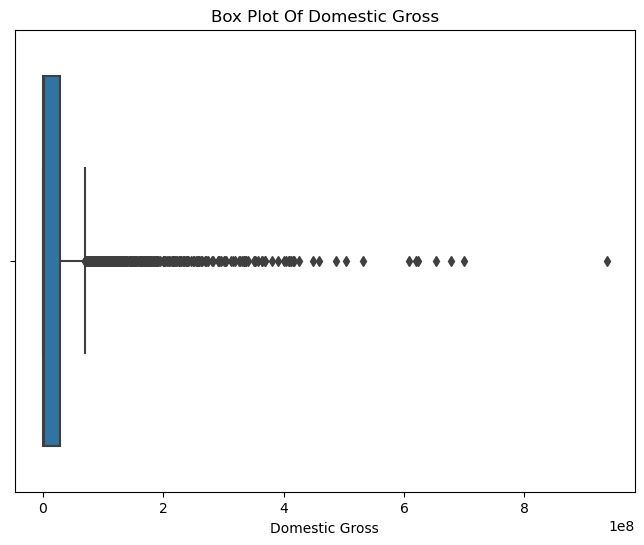

In [382]:
cleaned_df = df.dropna(subset=['domestic_gross'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['domestic_gross'])
plt.title('Box Plot Of Domestic Gross')
plt.xlabel('Domestic Gross')

plt.show()


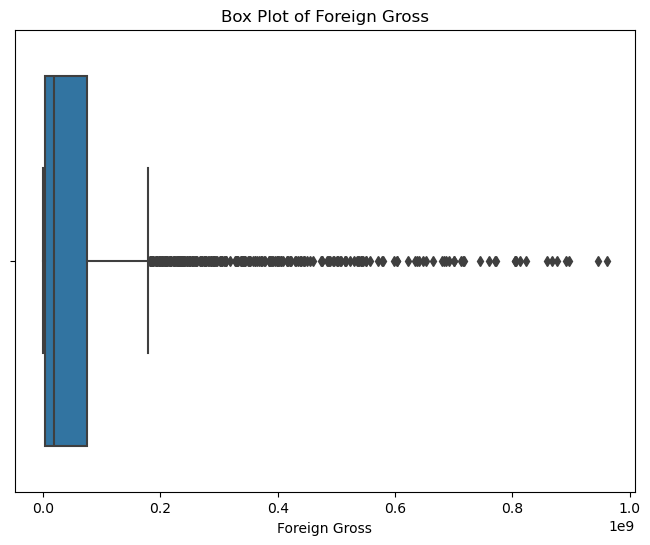

In [383]:
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')

cleaned_df = df.dropna(subset=['foreign_gross'])

plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_df['foreign_gross'])
plt.title('Box Plot of Foreign Gross')
plt.xlabel('Foreign Gross')

plt.show()

Replace the NaN values in the domestic_gross with the median value.

Replace the NaN values in the foreign_gross with the mean value.

In [384]:
domestic_gross_median = df['domestic_gross'].median()

df['domestic_gross'].fillna(domestic_gross_median, inplace=True)

df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [385]:
df.isnull().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1355
year                 0
dtype: int64

In [386]:
foreign_gross_mean = df['foreign_gross'].mean()

df['foreign_gross'].fillna(foreign_gross_mean, inplace=True)

df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,6.643000e+08,2010
3,Inception,WB,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,2400.0,7.505704e+07,2018


In [387]:
df.isnull().sum()

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [388]:
df['total_gross_income'] = df['domestic_gross'] + df['foreign_gross']

new_order = ['title', 'studio', 'total_gross_income', 'domestic_gross', 'foreign_gross', 'year']
df = df[new_order]

df

,title,studio,total_gross_income,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,1.067000e+09,415000000.0,6.520000e+08,2010
1,Alice in Wonderland (2010),BV,1.025500e+09,334200000.0,6.913000e+08,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,9.603000e+08,296000000.0,6.643000e+08,2010
3,Inception,WB,8.283000e+08,292600000.0,5.357000e+08,2010
4,Shrek Forever After,P/DW,7.526000e+08,238700000.0,5.139000e+08,2010
...,...,...,...,...,...,...
3382,The Quake,Magn.,7.506324e+07,6200.0,7.505704e+07,2018
3383,Edward II (2018 re-release),FM,7.506184e+07,4800.0,7.505704e+07,2018
3384,El Pacto,Sony,7.505954e+07,2500.0,7.505704e+07,2018
3385,The Swan,Synergetic,7.505944e+07,2400.0,7.505704e+07,2018


c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

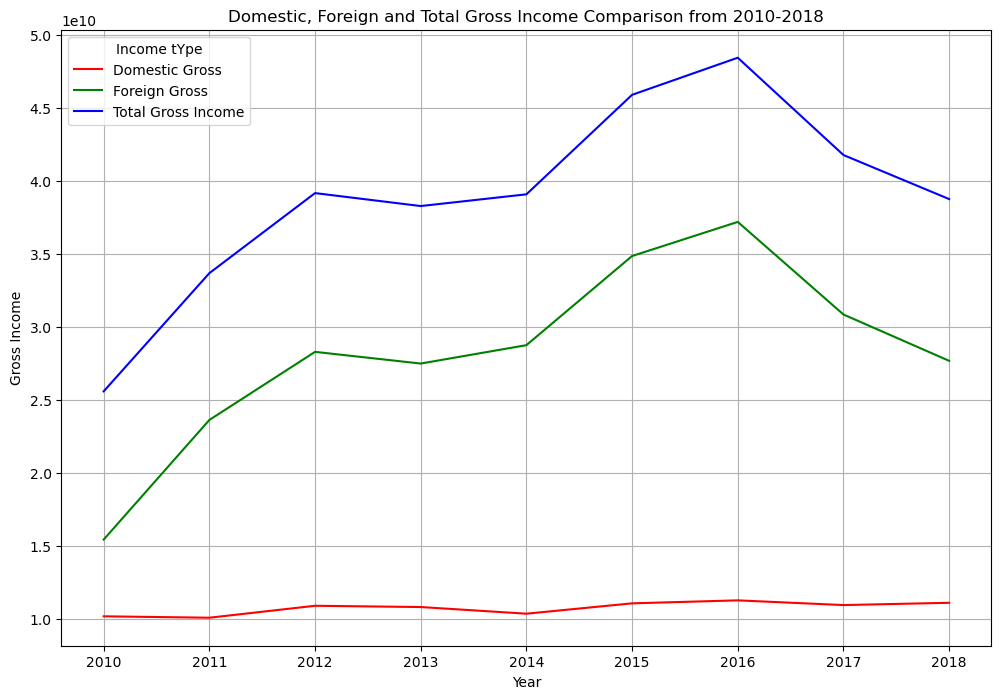

In [389]:
yearly_gross_income = df.groupby('year').agg({'domestic_gross': 'sum', 'foreign_gross': 'sum', 'total_gross_income': 'sum'}).reset_index()

colors = ['red', 'green', 'blue']

plt.figure(figsize=(12, 8))
for i, income_type in enumerate(['domestic_gross', 'foreign_gross', 'total_gross_income']):
    sns.lineplot(data=yearly_gross_income, x = 'year', y = income_type, color = colors[i], label = income_type.replace('_', ' ').title())

plt.title('Domestic, Foreign and Total Gross Income Comparison from 2010-2018')
plt.xlabel('Year')
plt.ylabel('Gross Income')
plt.xticks(yearly_gross_income['year'])
plt.legend(title='Income tYpe')
plt.grid(True)

plt.show()

Move to a different analysis with different data sets

In [390]:
df1 = pd.read_csv(r'C:\Users\pc\Downloads\dsc-phase-1-project-v2-3\zippedData\imdb.name.basics.csv.gz')
df1

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [391]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB


In [392]:
df2 = pd.read_csv(r'C:\Users\pc\Downloads\dsc-phase-1-project-v2-3\zippedData\imdb.title.ratings.csv.gz')
df2

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [393]:
df3 = pd.read_csv(r'zippedData/imdb.title.principals.csv.gz')
df3

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


Merge df1, df2 and df3 for my analysis

In [394]:
df4 = pd.merge(df2, df3, on = 'tconst', how = 'inner')

df5 = pd.merge(df1, df4, on = 'nconst', how = 'inner')
df5

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,tconst,averagerating,numvotes,ordering,category,job,characters
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,6.0,15612,9,producer,producer,NaN
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,3.6,582,7,composer,NaN,NaN
2,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,4.7,214,7,composer,NaN,NaN
3,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt3564200,3.6,1388,9,composer,NaN,NaN
4,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,4.0,127,8,composer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629593,nm9989145,Szilvia Herr,NaN,NaN,actress,NaN,tt8723836,7.6,489,2,actress,NaN,"[""Eszter""]"
629594,nm9989840,Mariya Shekaturova,NaN,NaN,actor,tt5953804,tt5953804,3.8,341,9,actor,NaN,"[""Dina""]"
629595,nm9990381,Susan Grobes,NaN,NaN,actress,NaN,tt6527982,8.2,6,2,actress,NaN,"[""Cheryl"",""Gypsy""]"
629596,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130",tt8737130,4.6,38,4,actress,NaN,NaN


Clean the above data and get rid of information that's irrelevant to this analysis

In [395]:
df5.drop(columns = ['birth_year', 'death_year', 'job', 'characters', 'ordering', 'nconst', 'category'], inplace = True)
df5

,primary_name,primary_profession,known_for_titles,tconst,averagerating,numvotes
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,6.0,15612
1,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,3.6,582
2,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,4.7,214
3,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt3564200,3.6,1388
4,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,4.0,127
...,...,...,...,...,...,...
629593,Szilvia Herr,actress,NaN,tt8723836,7.6,489
629594,Mariya Shekaturova,actor,tt5953804,tt5953804,3.8,341
629595,Susan Grobes,actress,NaN,tt6527982,8.2,6
629596,Joo Yeon So,actress,"tt9090932,tt8737130",tt8737130,4.6,38


Find a file with genres and tconst columns and merge them for sufficient analysis

In [396]:
df6 = pd.read_csv(r'C:\Users\pc\Downloads\dsc-phase-1-project-v2-3\zippedData\imdb.title.basics.csv.gz')
df6

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [397]:
# df7 = pd.merge(df5, df6[['genres']], on = 'tconst')
# df7

df6['tconst']

0         tt0063540
1         tt0066787
2         tt0069049
3         tt0069204
4         tt0100275
            ...    
146139    tt9916538
146140    tt9916622
146141    tt9916706
146142    tt9916730
146143    tt9916754
Name: tconst, Length: 146144, dtype: object

In [398]:
df5['tconst']

0         tt2398241
1         tt2281215
2         tt0433397
3         tt3564200
4         tt1681372
            ...    
629593    tt8723836
629594    tt5953804
629595    tt6527982
629596    tt8737130
629597    tt8739240
Name: tconst, Length: 629598, dtype: object

In [399]:
if df5['tconst'].equals(df6['tconst']):
    print(True)
else:
    print(False)

False


df5['tconst']!= df6['tconst']; therefore work with df5

In [400]:
df5

,primary_name,primary_profession,known_for_titles,tconst,averagerating,numvotes
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,6.0,15612
1,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,3.6,582
2,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,4.7,214
3,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt3564200,3.6,1388
4,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,4.0,127
...,...,...,...,...,...,...
629593,Szilvia Herr,actress,NaN,tt8723836,7.6,489
629594,Mariya Shekaturova,actor,tt5953804,tt5953804,3.8,341
629595,Susan Grobes,actress,NaN,tt6527982,8.2,6
629596,Joo Yeon So,actress,"tt9090932,tt8737130",tt8737130,4.6,38


In [401]:
df5['tconst'].duplicated().value_counts()

tconst
True     555913
False     73685
Name: count, dtype: int64

In [402]:
df5.drop_duplicates(subset = ['tconst'], inplace = True)

In [403]:
df5

,primary_name,primary_profession,known_for_titles,tconst,averagerating,numvotes
0,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,6.0,15612
1,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,3.6,582
2,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,4.7,214
3,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt3564200,3.6,1388
4,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,4.0,127
...,...,...,...,...,...,...
626731,Marco Niemeijer,"director,writer,cinematographer","tt7708926,tt5132170",tt7708926,7.0,9
627494,Sandy Ding,"director,writer,producer","tt6441144,tt4150214,tt5918088",tt5918088,7.5,20
627569,Park Bum-Soo,"director,writer","tt4219354,tt4773564",tt4773564,5.6,7
628905,Aleksey Bystritskiy,director,"tt6112166,tt7424890",tt6112166,4.8,5


In [404]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73685 entries, 0 to 629388
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_name        73685 non-null  object 
 1   primary_profession  72565 non-null  object 
 2   known_for_titles    72481 non-null  object 
 3   tconst              73685 non-null  object 
 4   averagerating       73685 non-null  float64
 5   numvotes            73685 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.9+ MB


In [405]:
df5.isnull().sum()

primary_name             0
primary_profession    1120
known_for_titles      1204
tconst                   0
averagerating            0
numvotes                 0
dtype: int64

In [406]:
df5['primary_profession'].fillna('discrete', inplace = True)
df5['known_for_titles'].fillna('others', inplace = True)
df5.isnull().sum()

primary_name          0
primary_profession    0
known_for_titles      0
tconst                0
averagerating         0
numvotes              0
dtype: int64

In [407]:
df5 = df5.rename(columns = {'tconst' : 'movie_id', 'averagerating' : 'average_rating', 'numvotes' : 'total_votes', 'primary_name' : 'lead_name',
                            'primary_profession' : 'primary_profession', 'known_for_titles' : 'known_for_movie_id'})[['movie_id', 'average_rating', 'total_votes', 'lead_name', 
                                                                                                                     'primary_profession', 'known_for_movie_id']]
df5

,movie_id,average_rating,total_votes,lead_name,primary_profession,known_for_movie_id
0,tt2398241,6.0,15612,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,tt2281215,3.6,582,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,tt0433397,4.7,214,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
3,tt3564200,3.6,1388,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
4,tt1681372,4.0,127,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
...,...,...,...,...,...,...
626731,tt7708926,7.0,9,Marco Niemeijer,"director,writer,cinematographer","tt7708926,tt5132170"
627494,tt5918088,7.5,20,Sandy Ding,"director,writer,producer","tt6441144,tt4150214,tt5918088"
627569,tt4773564,5.6,7,Park Bum-Soo,"director,writer","tt4219354,tt4773564"
628905,tt6112166,4.8,5,Aleksey Bystritskiy,director,"tt6112166,tt7424890"


Done with data cleaning, now proceed with analysing a cleaned version of df5

In [408]:
highest_votes = df5['total_votes'].max()
highest_votes

1841066

In [409]:
highly_voted_movie = df5.query('total_votes == 1841066')

highly_voted_movie

,movie_id,average_rating,total_votes,lead_name,primary_profession,known_for_movie_id
6893,tt1375666,8.8,1841066,Joseph Gordon-Levitt,"actor,producer,soundtrack","tt1375666,tt1276104,tt1306980,tt2229499"


In [410]:
top_voted_movies = df5.sort_values(by = 'total_votes', ascending = False).head(10)

top_voted_movies 

,movie_id,average_rating,total_votes,lead_name,primary_profession,known_for_movie_id
6893,tt1375666,8.8,1841066,Joseph Gordon-Levitt,"actor,producer,soundtrack","tt1375666,tt1276104,tt1306980,tt2229499"
13509,tt1345836,8.4,1387769,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506"
13510,tt0816692,8.6,1299334,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506"
2131,tt1853728,8.4,1211405,Kerry Washington,"actress,producer,soundtrack","tt1837576,tt0455590,tt0206275,tt1853728"
12091,tt0848228,8.1,1183655,Alan Silvestri,"composer,soundtrack,music_department","tt0458339,tt0093773,tt0338348,tt0109830"
56396,tt0993846,8.2,1035358,Terence Winter,"producer,writer,actor","tt0141842,tt0979432,tt0993846,tt0430308"
38894,tt1130884,8.1,1005960,Mike Medavoy,"producer,actor,executive","tt1130884,tt0482546,tt0443706,tt0947798"
21073,tt2015381,8.1,948394,Bradley Cooper,"actor,producer,soundtrack","tt2179136,tt1045658,tt1800241,tt1517451"
2458,tt1431045,8.0,820847,Rhett Reese,"writer,producer,miscellaneous","tt5442430,tt1156398,tt1583421,tt1431045"
10162,tt1392170,7.2,795227,Jon Kilik,"producer,assistant_director,production_manager","tt0401383,tt0449467,tt1392170,tt1100089"


In [411]:
top_rated_movies = df5.sort_values(by = 'average_rating', ascending = False).head(10)
top_rated_movies

,movie_id,average_rating,total_votes,lead_name,primary_profession,known_for_movie_id
14039,tt9715646,10.0,20,Alice Walker,"writer,producer,miscellaneous","tt1200263,tt0088939,tt8101954,tt0372268"
126665,tt7259300,10.0,6,Diyar Akar,discrete,others
414095,tt4109192,10.0,6,Soudabeh Moradian,"director,editor,producer","tt1637328,tt1642629,tt3103442,tt1991553"
6590,tt7227500,10.0,6,Jeffrey Buckner Ford,actor,"tt0092974,tt0106918,tt1758575,tt0109446"
515537,tt5089804,10.0,7,Lindsay Thompson,"cinematographer,director,actress","tt5089804,tt5558466,tt5095226,tt6863802"
481698,tt5344358,10.0,6,Karen Frazier,discrete,"tt5344358,tt2076566"
23025,tt10176328,10.0,5,Ivana Diniz,"director,writer",others
228781,tt6991826,10.0,5,Andre Gregory,"actor,producer,writer","tt0082783,tt0087951,tt0095497,tt0106697"
69331,tt2632430,10.0,5,Nadia Ben Rachid,"editor,editorial_department,location_management","tt5105218,tt0157160,tt0104779,tt3409392"
477623,tt4944240,10.0,5,Dylan Schnitker,"cinematographer,camera_department,writer","tt3799510,tt3109858,tt3883920,tt5302060"


In [412]:
popular_names = df5['lead_name'].value_counts().head(10)
pn_df = pd.DataFrame(popular_names)
pn_df

,count
lead_name,
Kevin MacLeod,86
Jason Blum,48
Rajatabha Dutta,36
Avinash,36
Mammootty,36
Rabiranjan Maitra,35
Dean Cain,34
Kunchacko Boban,32
Brahmanandam,32


In [413]:
popular_names_df = df5[df5['lead_name'].isin(popular_names.index)]

mean_average_rating = popular_names_df.groupby('lead_name')['average_rating'].mean()
mean_total_votes = popular_names_df.groupby('lead_name')['total_votes'].mean()

mtv_df = pd.DataFrame(mean_total_votes)
mtv_df

,total_votes
lead_name,
Armand Assante,767.433333
Avinash,150.972222
Brahmanandam,312.750000
Dean Cain,1607.000000
Jason Blum,71402.625000
Kevin MacLeod,34.104651
Kunchacko Boban,451.500000
Mammootty,1276.194444
Rabiranjan Maitra,180.485714


In [414]:
mar_df = pd.DataFrame(mean_average_rating)
mar_df

,average_rating
lead_name,
Armand Assante,5.490000
Avinash,6.316667
Brahmanandam,5.718750
Dean Cain,5.205882
Jason Blum,5.970833
Kevin MacLeod,6.495349
Kunchacko Boban,5.440625
Mammootty,5.186111
Rabiranjan Maitra,6.697143


In [415]:
popular_names_df = pd.merge(pn_df[['count']], mtv_df, on = 'lead_name', how = 'inner')
popular_names_df1 = pd.merge(popular_names_df, mar_df, on = 'lead_name', how = 'inner')

popular_names_df1

,count,total_votes,average_rating
lead_name,,,
Kevin MacLeod,86,34.104651,6.495349
Jason Blum,48,71402.625000,5.970833
Rajatabha Dutta,36,134.444444,6.302778
Avinash,36,150.972222,6.316667
Mammootty,36,1276.194444,5.186111
Rabiranjan Maitra,35,180.485714,6.697143
Dean Cain,34,1607.000000,5.205882
Kunchacko Boban,32,451.500000,5.440625
Brahmanandam,32,312.750000,5.718750
